## PGN Reader tests

in this notebook i perform some tests with the PGN reader i implemented. This will help make analysis of long games much faster, and i won't have to spend time writing all the individual moves. 

In [21]:
import matplotlib.pyplot as plt

Date: 2023.03.02
White: Lucas08128
Black: walu93
Winner: Black
White Elo: 695
Black Elo: 649
Game: 1. d4 d5 2. Nf3 Bf5 3. Bf4 Nc6 4. e3 e6 5. Bb5 a6 6. Bd3 Bb4+ 7. c3 Ba5 8. b4
 Bb6 9. O-O Nf6 10. b5 axb5 11. Bxb5 O-O 12. Nh4 Bg4 13. f3 Bh5 14. g4 Bg6 15. g5
 Nh5 16. Nxg6 hxg6 17. Bxc6 bxc6 18. Be5 Qxg5+ 19. Kf2 Qh4+ 20. Bg3 Nxg3 21. hxg3
 Qh2+ 22. Ke1 Qxg3+ 23. Ke2 Qg5 24. Rg1 Qh4 25. Rh1 Qg3 26. Rg1 Qh2+ 27. Kd3 c5
 28. Rh1 Qb2 29. Nd2 c4+ 30. Ke2 Rxa2 31. Rb1 Qxc3 32. Rc1 Qd3+ 33. Kf2 Rxd2+ 34.
 Qxd2 Qxd2+ 35. Kg3 Qxe3 36. Rcg1 Bxd4 37. Rg2 Qg5+ 38. Kh3 Qh5+ 39. Kg3 Qxh1 0-1 
Board initialization


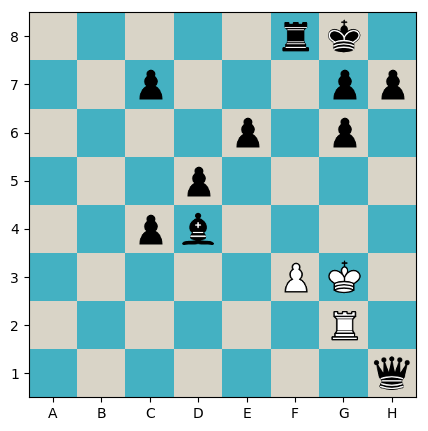

In [22]:
reader = PGNReader("juego_muestra.pgn")

Board initialization


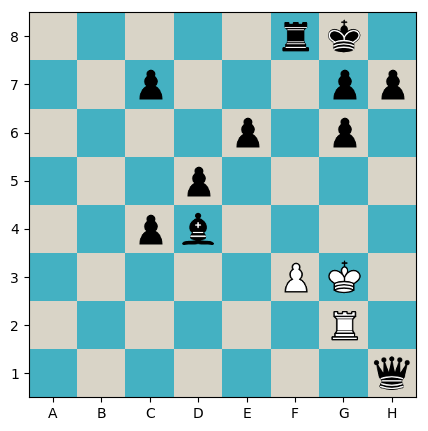

In [23]:
gameMoves = reader.moves
specialMoveValues = reader.specialMoveValues

board = Chessboard()
whiteAverageDegrees = []
blackAverageDegrees = []

for i in range(0,len(gameMoves)):
    board.makeMove(gameMoves[i], specialMoveValues[i])
    whiteGraph = Chessgraph()
    blackGraph = Chessgraph()
    whiteGraph.initializeFromChessboardColored(board, ChessPieceColor.WHITE)
    whiteAverageDegrees.append(whiteGraph.getMeanDegree())
    blackGraph.initializeFromChessboardColored(board, ChessPieceColor.BLACK)
    blackAverageDegrees.append(blackGraph.getMeanDegree())

#Show final configuration of the board
board.displayBoard()

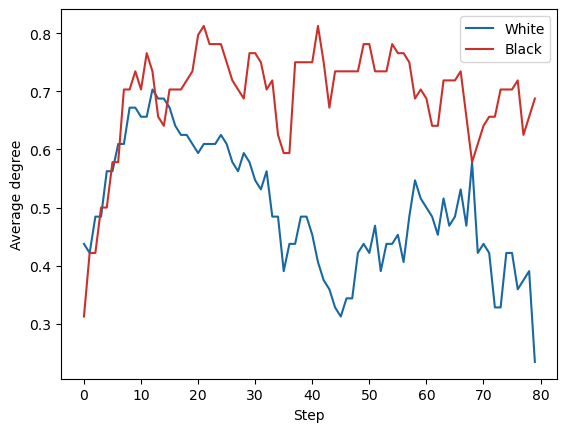

In [24]:
plt.figure()
plt.plot(whiteAverageDegrees, color = "#1868a1", label = "White")
plt.plot(blackAverageDegrees, color = "#cc302b", label = "Black")
plt.xlabel("Step")
plt.ylabel("Average degree")
plt.legend()

Nice, i think i'm ready to do some tests on different openings, see if they exhibit some interesting patter